In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [16]:
data = pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")

In [17]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [18]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [19]:
data['gender']= data['gender'].map({'male':0,'female':1})

In [20]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,group B,bachelor's degree,standard,none,72,72,74
1,1,group C,some college,standard,completed,69,90,88
2,1,group B,master's degree,standard,none,90,95,93
3,0,group A,associate's degree,free/reduced,none,47,57,44
4,0,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,1,group E,master's degree,standard,completed,88,99,95
996,0,group C,high school,free/reduced,none,62,55,55
997,1,group C,high school,free/reduced,completed,59,71,65
998,1,group D,some college,standard,completed,68,78,77


In [21]:
data['test preparation course']=data['test preparation course'].map({'none':0,'completed':1})

In [22]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,group B,bachelor's degree,standard,0,72,72,74
1,1,group C,some college,standard,1,69,90,88
2,1,group B,master's degree,standard,0,90,95,93
3,0,group A,associate's degree,free/reduced,0,47,57,44
4,0,group C,some college,standard,0,76,78,75
...,...,...,...,...,...,...,...,...
995,1,group E,master's degree,standard,1,88,99,95
996,0,group C,high school,free/reduced,0,62,55,55
997,1,group C,high school,free/reduced,1,59,71,65
998,1,group D,some college,standard,1,68,78,77


In [23]:
data['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [24]:
data.drop('lunch',axis=1,inplace=True)# deleted the lunch data because no need of that data to predict

In [25]:
data

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score
0,1,group B,bachelor's degree,0,72,72,74
1,1,group C,some college,1,69,90,88
2,1,group B,master's degree,0,90,95,93
3,0,group A,associate's degree,0,47,57,44
4,0,group C,some college,0,76,78,75
...,...,...,...,...,...,...,...
995,1,group E,master's degree,1,88,99,95
996,0,group C,high school,0,62,55,55
997,1,group C,high school,1,59,71,65
998,1,group D,some college,1,68,78,77


In [26]:
data['total_score']= data['math score'] +data['reading score']+ data['writing score']


In [27]:
data

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,total_score
0,1,group B,bachelor's degree,0,72,72,74,218
1,1,group C,some college,1,69,90,88,247
2,1,group B,master's degree,0,90,95,93,278
3,0,group A,associate's degree,0,47,57,44,148
4,0,group C,some college,0,76,78,75,229
...,...,...,...,...,...,...,...,...
995,1,group E,master's degree,1,88,99,95,282
996,0,group C,high school,0,62,55,55,172
997,1,group C,high school,1,59,71,65,195
998,1,group D,some college,1,68,78,77,223


In [28]:
max(data['total_score']) # that means out of 300 the highest score scored by thee student can be 300.

300

In [29]:
input_features = data[['gender','race/ethnicity','parental level of education','test preparation course','math score','reading score','writing score']]

In [30]:
input_features

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score
0,1,group B,bachelor's degree,0,72,72,74
1,1,group C,some college,1,69,90,88
2,1,group B,master's degree,0,90,95,93
3,0,group A,associate's degree,0,47,57,44
4,0,group C,some college,0,76,78,75
...,...,...,...,...,...,...,...
995,1,group E,master's degree,1,88,99,95
996,0,group C,high school,0,62,55,55
997,1,group C,high school,1,59,71,65
998,1,group D,some college,1,68,78,77


In [31]:
output = data['total_score']

In [32]:
output

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Name: total_score, Length: 1000, dtype: int64

In [33]:
#“If a student’s writing and reading scores are good, there’s a higher chance they’ll also perform well in math.”

In [34]:
data[['math score','reading score','writing score']].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [35]:
#now we will visualize the correlation btw reading,writing

<Axes: xlabel='writing score', ylabel='reading score'>

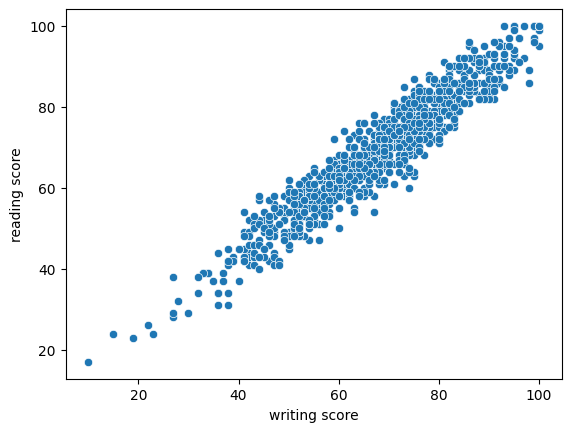

In [36]:
sns.scatterplot(x =data['writing score'],y =data['reading score'])

<Axes: xlabel='writing score', ylabel='math score'>

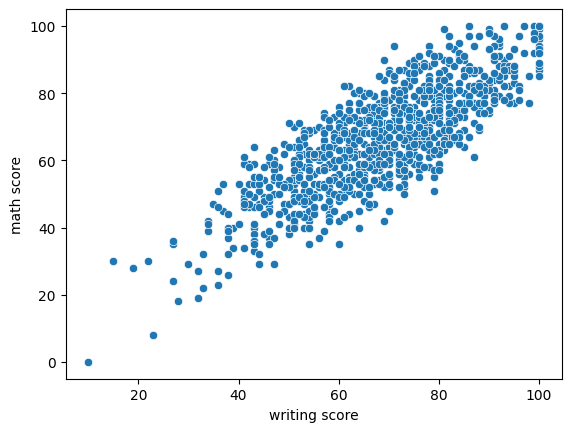

In [37]:
sns.scatterplot(x =data['writing score'],y =data['math score'])

<Axes: xlabel='reading score', ylabel='math score'>

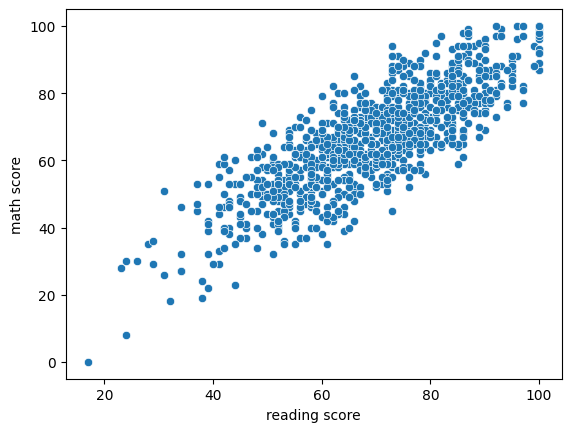

In [38]:
sns.scatterplot(x =data['reading score'],y =data['math score'])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


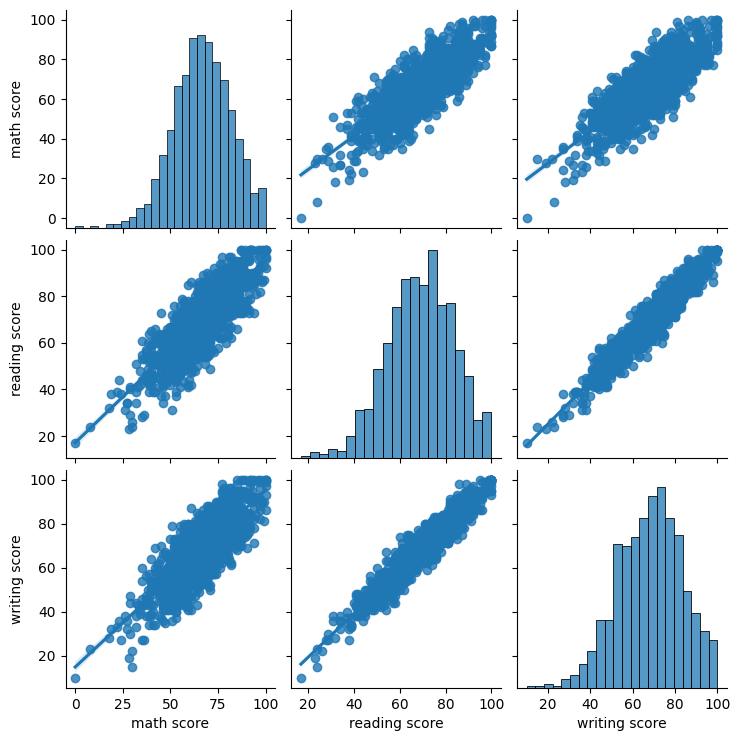

In [39]:
sns.pairplot(data[['math score','reading score','writing score']], kind='reg')


In [40]:
input_features_train,input_features_test,output_train,output_test = train_test_split(input_features,output,test_size=0.2,random_state=42)

In [41]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [42]:
# Above library is used as our data contains categorical and numerical values both so to train data we have to convert the categorical values into numerical

In [43]:
categorical_value = ['race/ethnicity','parental level of education']
numerical_value = ['gender','test preparation course','math score','reading score','writing score']

In [44]:
preprocessor = ColumnTransformer(transformers=[
    ('cat',OneHotEncoder(drop='first'),categorical_value),
    ('num',StandardScaler(),numerical_value)
],remainder='passthrough')

In [45]:
X_preprocessed = preprocessor.fit_transform(input_features_train)
X_Test_preprocessed  = preprocessor.fit_transform(input_features_test)
print(X_preprocessed.shape) #TRANSFORM VALUES FOR 80% TRAIN DATA.
print(X_Test_preprocessed.shape) #TRANSFORM VALUES FOR 20% TEST DATA. 


(800, 14)
(200, 14)


In [46]:
X_preprocessed

array([[ 0.        ,  0.        ,  1.        , ..., -0.29945237,
         0.03079054,  0.43405338],
       [ 0.        ,  1.        ,  0.        , ..., -0.03305048,
         0.9302895 ,  0.96470125],
       [ 0.        ,  0.        ,  1.        , ...,  0.83275564,
         1.34544287,  1.1636942 ],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.89885661,
        -0.52274728, -1.02522827],
       [ 0.        ,  1.        ,  0.        , ..., -1.09865802,
        -1.49143847, -1.02522827],
       [ 0.        ,  0.        ,  1.        , ...,  1.23235847,
         1.48382733,  1.36268716]])

In [47]:
X_Test_preprocessed

array([[ 0.        ,  1.        ,  0.        , ...,  1.70135756,
         1.22151854,  1.13077713],
       [ 1.        ,  0.        ,  0.        , ..., -0.73464799,
        -0.10802545,  0.4222298 ],
       [ 0.        ,  0.        ,  1.        , ...,  0.99619806,
         0.35731495,  0.3578164 ],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.6115656 ,
         0.88913255,  0.61546998],
       [ 0.        ,  1.        ,  0.        , ...,  0.03461692,
         0.62322375,  0.48664319],
       [ 0.        ,  0.        ,  1.        , ..., -0.22180472,
         0.42379215,  0.3578164 ]])

In [48]:
from sklearn.pipeline import Pipeline # NOW WE WILL ADD PIPELINE AND ADD THIS TO THE MODEL.

In [49]:
model = Pipeline([
    ('preprocessor',preprocessor),
    ('classifier',LogisticRegression())
])# PIEPELINE IS BEEN MADE AND IN THIS I HAVE INSERTEDD MY TRANSFORMER AND CLASSIFIER TO MAKE IT SIMPLE.

In [50]:
model.fit(input_features_train,output_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['race/ethnicity',
                                                   'parental level of '
                                                   'education']),
                                                 ('num', StandardScaler(),
                                                  ['gender',
                                                   'test preparation course',
                                                   'math score',
                                                   'reading score',
                                                   'writing score'])])),
                ('classifier', LogisticRegression())])

In [51]:
y_pred = model.predict(input_features_test)

In [52]:
y_pred

array([232, 180, 239, 205, 267, 241, 212, 180, 255, 145, 155, 130, 224,
       187, 275, 224, 155, 140, 155, 194, 205, 169, 169, 155, 241, 241,
       207, 155, 134, 187, 191, 206, 186, 205, 205, 178, 241, 223, 232,
       104, 232, 184, 207, 178, 241, 198, 215, 134, 241, 224, 212, 214,
       247, 180, 231, 223, 239, 154, 244, 250, 151, 248, 232, 191, 238,
       211, 223, 154, 223, 235, 198, 249, 177, 155, 173, 205, 275, 191,
       198, 155, 196, 155, 255, 200, 186, 200, 223, 198, 248, 151, 234,
       262, 206, 205, 122, 206, 196, 178, 232, 198, 232, 172, 155, 232,
       204, 191, 155, 215, 224, 161, 161, 249, 155, 169, 235, 154, 173,
       151, 212, 241, 205, 178, 255, 216, 198, 220, 224, 216, 157, 205,
       235, 241, 155, 293, 232, 134, 291, 244, 205, 155, 155, 180, 198,
       155, 241, 191, 155, 220, 151, 226, 224, 224, 205, 173, 235, 213,
       163, 211, 204, 155, 169, 212, 223, 173, 275, 205, 151, 262, 211,
       232, 244, 205, 275, 223, 176, 155, 155, 232, 262, 232, 19

In [53]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [56]:
print("R² Score:", r2_score(output_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(output_test, y_pred))
print("Mean Squared Error:", mean_squared_error(output_test, y_pred))

R² Score: 0.8341392477713798
Mean Absolute Error: 13.255
Mean Squared Error: 319.995


In [55]:
output_test

521    261
737    192
740    225
660    224
411    245
      ... 
408    165
332    171
208    231
613    216
78     207
Name: total_score, Length: 200, dtype: int64

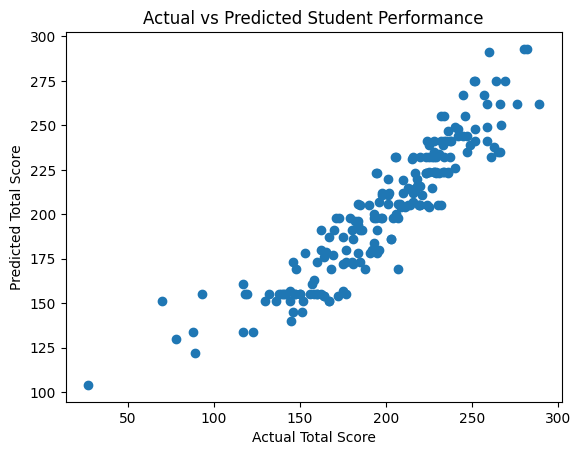

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

plt.scatter(output_test, y_pred)
plt.xlabel("Actual Total Score")
plt.ylabel("Predicted Total Score")
plt.title("Actual vs Predicted Student Performance")
plt.show()
